# Fitting the distribution of heights data

We will write code to perform a steepest descent to fit a Gaussian model to the distribution of heights data.

<IPython.core.display.Javascript object>


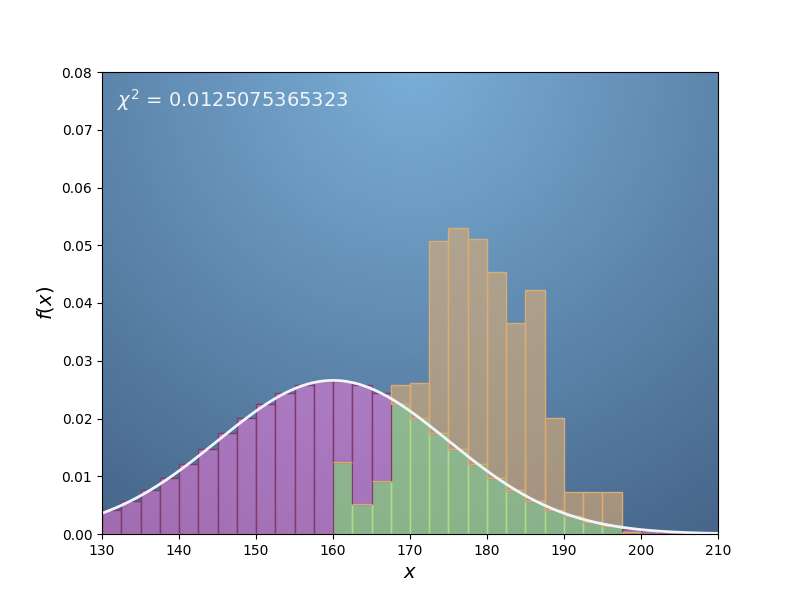

In [1]:
# Loading the dependancies
from readonly.HeightsModule import *

## Background

We have data for the heights of people in a population. It has been plotted as a histogram, i.e., a bar chart where each bar has a width representing a range of heights, and an area which is the probability of finding a person with a height in that range.
We intend to model that data with a function, such as a Gaussian, with two parameters, rather than holding all the data in the histogram.

The Gaussian function is given as,
$$f(\mathbf{x};\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(\mathbf{x} - \mu)^2}{2\sigma^2}\right)$$

The figure above shows the data in orange, the model in magenta, and where they overlap in green.

This particular model has not been fit well - there is not a strong overlap.

*Definition of $\chi^2$*

The squared difference of the data and the model, i.e $\chi^2 = |\mathbf{y} - f(\mathbf{x};\mu, \sigma)|^2$.

Here, $\mathbf{x}$ an $\mathbf{y}$ are represented as vectors as these are lists of all of the data points.

The |*abs-squared*|${}^2$ encodes squaring and summing of the residuals on each bar.

To improve the fit, we want to alter the parameters $\mu$ and $\sigma$, and see how that changes the $\chi^2$.

That is, we will need to calculate the Jacobian,
$$ \mathbf{J} = \left[ \frac{\partial ( \chi^2 ) }{\partial \mu} , \frac{\partial ( \chi^2 ) }{\partial \sigma} \right]\;. $$

Let's look at the first term, $\frac{\partial ( \chi^2 ) }{\partial \mu}$, using the multi-variate chain rule, this can be written as,
$$ \frac{\partial ( \chi^2 ) }{\partial \mu} = -2 (\mathbf{y} - f(\mathbf{x};\mu, \sigma)) \cdot \frac{\partial f}{\partial \mu}(\mathbf{x};\mu, \sigma)$$
We can write a similar expression for $\frac{\partial ( \chi^2 ) }{\partial \sigma}$

The Jacobians rely on the derivatives $\frac{\partial f}{\partial \mu}$ and $\frac{\partial f}{\partial \sigma}$.
Writing functions below for these.

In [2]:
# PACKAGE
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Gaussian function.
def f (x,mu,sig) :
    return np.exp(-(x-mu)**2/(2*sig**2)) / np.sqrt(2*np.pi) / sig

# Derivative of Gaussian function with respect to μ.
def dfdmu (x,mu,sig) :
    return (f(x, mu, sig) * (x-mu)) / (sig**2)

# Derivative of Gaussian function with respect to σ.
def dfdsig (x,mu,sig) :
    return f(x, mu, sig) * (((x-mu)**2 / sig**3) - (1/sig))

We know that steepest descent move around in parameter space is proportional to the negative of the Jacobian,
i.e., $\begin{bmatrix} \delta\mu \\ \delta\sigma \end{bmatrix} \propto -\mathbf{J} $, with the constant of proportionality being the *aggression* of the algorithm.

Writing the function below to build the Jacobian vector using the terms $\frac{\partial ( \chi^2 ) }{\partial \sigma}$ and $\frac{\partial ( \chi^2 ) }{\partial \mu}$.

In [4]:
# Defining jacobian Vector and step size 
def steepest_step (x, y, mu, sig, aggression) :
    J = np.array([
        -2*(y - f(x,mu,sig)) @ dfdmu(x,mu,sig),
        -2*(y - f(x,mu,sig)) @ dfdsig(x,mu,sig)
    ])
    step = -J * aggression
    return step

## Test the functions

<IPython.core.display.Javascript object>


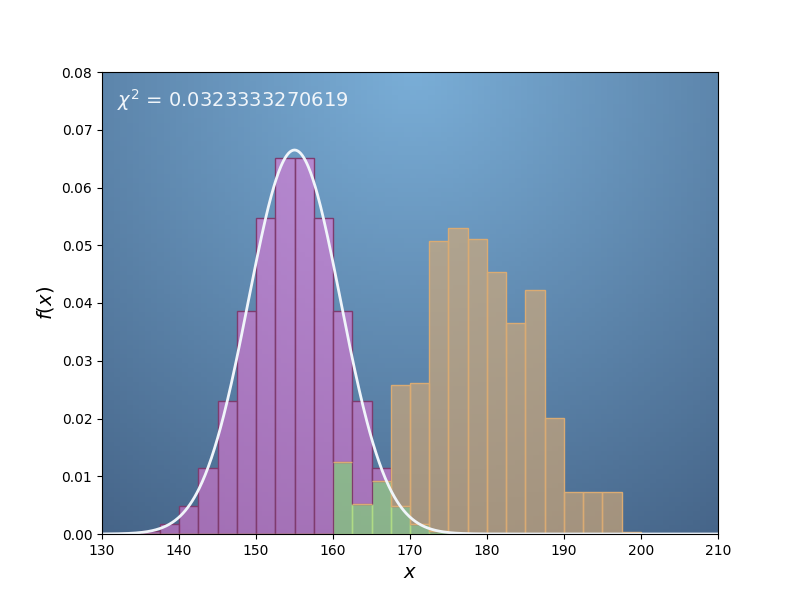

<IPython.core.display.Javascript object>


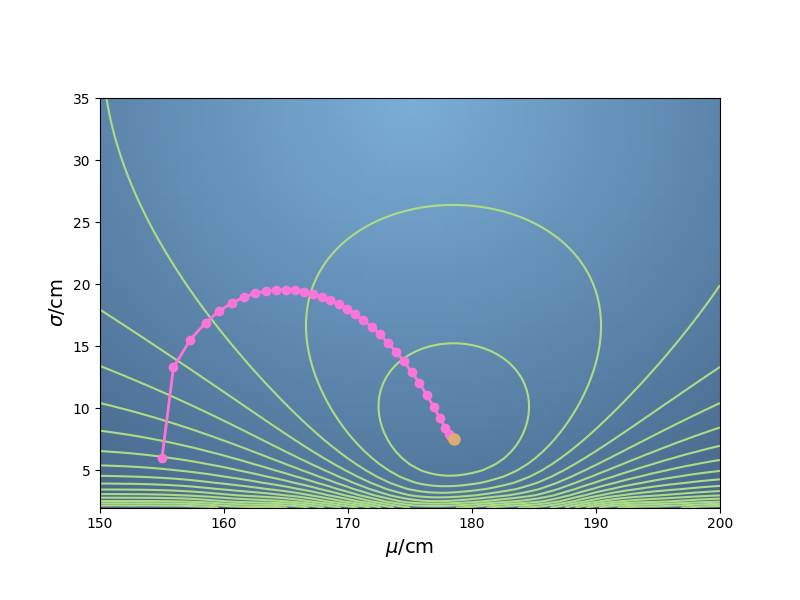

<IPython.core.display.Javascript object>


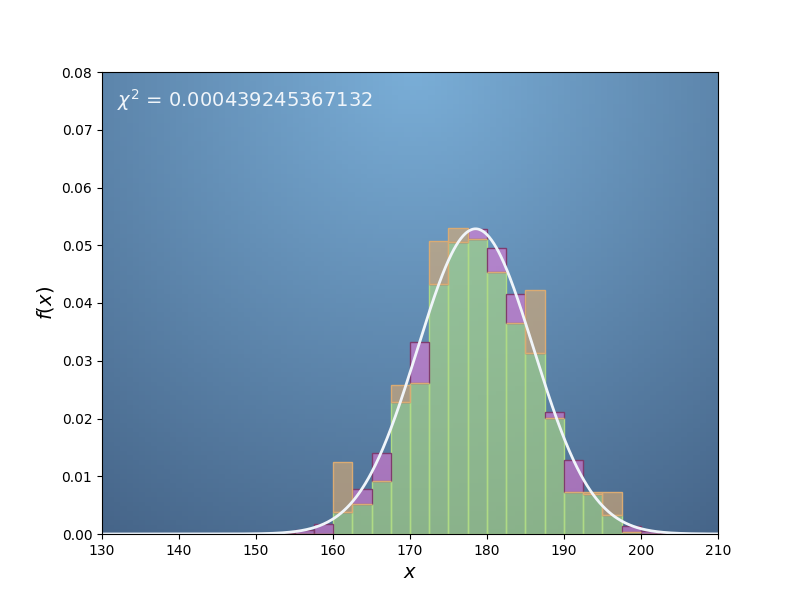

In [5]:
# Getting the heights data, ranges and frequencies
x,y = heights_data()

# Assigning trial values for these.
mu = 155 ; sig = 6

# Keeping track of mu and sigma so that we can plot their evolution.
p = np.array([[mu, sig]])

# Plotting the histogram for our parameter guess
histogram(f, [mu, sig])

# Doing a few rounds of steepest descent.
for i in range(50) :
    dmu, dsig = steepest_step(x, y, mu, sig, 2000)
    mu += dmu
    sig += dsig
    p = np.append(p, [[mu,sig]], axis=0)
    
# Plotting the path through parameter space.
contour(f, p)

# Plotting the final histogram.
histogram(f, [mu, sig])

Note that the path taken through parameter space is not necesarily the most direct path, as with steepest descent we always move perpendicular to the contours.